In [1]:
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import pprint

In [2]:
import os
os.getcwd()

'/Users/binun/Documents/GitHub/CVML-DS-Algorithms/src/ml/numpy'

In [4]:
csv_file = '/Users/binun/Documents/GitHub/CVML-DS-Algorithms/test_data/data.csv'
df = pd.read_csv(csv_file)
print(df.head())
df.drop('id',axis=1, inplace=True)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [6]:
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [8]:
# pie chart with labels
# data distribution
px.pie(df, 'diagnosis')

In [10]:
# check the skweness, dispersion of the data
for column in df.drop('diagnosis', axis=1).columns[:5]:
    fig = px.box(data_frame=df, x = 'diagnosis', color='diagnosis', y=column)
    fig.show()


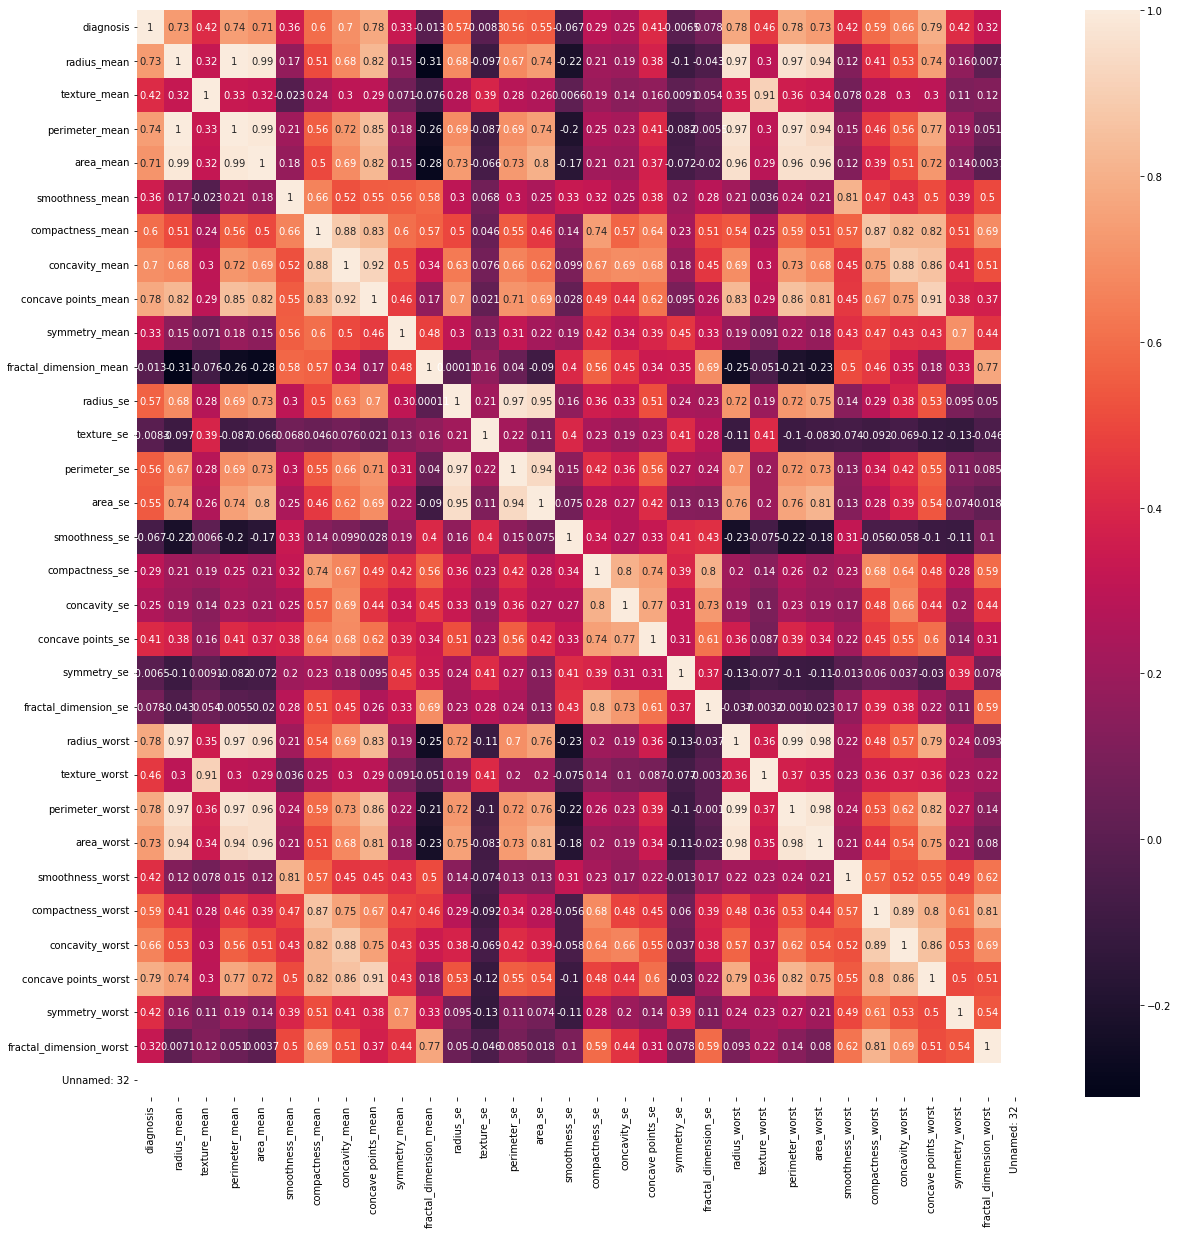

In [11]:
# check correlation with target
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) # M- 1, B - 0
# compute the correlation
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
# perform feature selection based on correlation
corr_target = abs(corr['diagnosis'])

# select high correlated featres
threshold = 0.5
relevant_features = corr_target[corr_target > threshold]

# get the names of the features
# print(relevant_features)
names = [name for name, value in relevant_features.iteritems()]
names.remove('diagnosis')

# print results
pprint.pprint(names)
#print(names)

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']


In [22]:
# assigning training data and training labels
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1) # N x 1 labels

In [27]:
len(X)

569